## ** Introdução ao Projeto de Análise de Comportamento do Usuário no Aplicativo de Venda de Produtos Alimentícios **

Neste projeto, o objetivo é analisar o comportamento do usuário no aplicativo de uma startup que vende produtos alimentícios, com foco em entender o funil de vendas e avaliar os resultados de um teste A/A/B, a fim de fornecer insights valiosos para aprimorar a experiência do usuário e otimizar as estratégias de design e vendas.

O primeiro passo será estudar o **funil de vendas** do aplicativo. Isso envolve analisar como os usuários progridem em direção à etapa de compra, identificando quantos usuários realmente concluem a compra e, mais importante, quantos ficam presos nas fases anteriores do funil. O desafio é entender quais etapas do processo de compra podem estar causando atritos ou desistências e quais fatores podem estar impactando negativamente a conversão.

O segundo objetivo será a análise dos resultados do **teste A/A/B**. Este teste foi conduzido para comparar a eficácia de fontes antigas e novas no design do aplicativo. Os usuários foram divididos em três grupos: dois grupos de controle com as fontes antigas e um grupo de teste com as fontes novas. O foco da análise será identificar qual conjunto de fontes resulta em melhores comportamentos de engajamento e conversão, ajudando a empresa a tomar uma decisão informada sobre se deve ou não adotar as novas fontes. A metodologia A/A/B nos permite garantir a precisão dos testes ao comparar os dois grupos de controle e, dessa forma, detectar possíveis fatores que possam distorcer os resultados.

A combinação de análises do funil de vendas e dos resultados dos testes A/A/B fornecerá uma visão holística do comportamento do usuário no aplicativo, permitindo que os gestores tomem decisões baseadas em dados sobre como melhorar a experiência do usuário e maximizar os resultados de vendas.

Este projeto utilizará um único conjunto de dados para as análises gerais do comportamento do usuário e dos testes A/A/B, garantindo uma abordagem integrada e eficiente. Como em projetos reais, os experimentos e ajustes são contínuos, e a análise constante dos dados é crucial para garantir que o aplicativo evolua de acordo com as necessidades dos usuários e as metas de negócios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

print("Primeiras 5 linhas:")
print(df.head())

print("\nInformações do DataFrame:")
print(df.info())

print("\nTipos de dados das colunas:")
print(df.dtypes)

print("\nQuantidade de valores nulos por coluna:")
print(df.isnull().sum())

print("\nAmostras aleatórias:")
print(df.sample(5))


Primeiras 5 linhas:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Tipos de dados das colunas:
EventName         object
DeviceIDHash       int64
EventTimestam

In [2]:
# Adicionando uma coluna de data e hora e uma coluna separada para datas

df['EventDatetime'] = pd.to_datetime(df['EventTimestamp'], unit='s')

df['EventDate'] = df['EventDatetime'].dt.date

print("Primeiras 5 linhas:")
print(df.head())

Primeiras 5 linhas:
                 EventName         DeviceIDHash  EventTimestamp  ExpId  \
0         MainScreenAppear  4575588528974610257      1564029816    246   
1         MainScreenAppear  7416695313311560658      1564053102    246   
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248   
3         CartScreenAppear  3518123091307005509      1564054127    248   
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248   

        EventDatetime   EventDate  
0 2019-07-25 04:43:36  2019-07-25  
1 2019-07-25 11:11:42  2019-07-25  
2 2019-07-25 11:28:47  2019-07-25  
3 2019-07-25 11:28:47  2019-07-25  
4 2019-07-25 11:48:42  2019-07-25  


## Estudo e verifique os dados:

In [3]:
# **1. Quantos eventos ficam nos registros?**
print("=== Quantidade de eventos nos registros ===")
total_eventos = len(df)
print(f"Total de eventos: {total_eventos}\n")

# **2. Quantos usuários ficam nos registros?**
print("=== Quantidade de usuários nos registros ===")
total_usuarios = df['DeviceIDHash'].nunique()
print(f"Total de usuários: {total_usuarios}\n")

=== Quantidade de eventos nos registros ===
Total de eventos: 244126

=== Quantidade de usuários nos registros ===
Total de usuários: 7551



In [4]:
# **3. Qual é o número médio de eventos por usuário?**
print("=== Número médio de eventos por usuário ===")
media_eventos_por_usuario = total_eventos / total_usuarios
print(f"Número médio de eventos por usuário: {media_eventos_por_usuario:.2f}\n")

# **4. Qual é o período de tempo que os dados cobrem?**
print("=== Período de tempo que os dados cobrem ===")
data_minima = df['EventDatetime'].min()
data_maxima = df['EventDatetime'].max()
print(f"Período de tempo dos dados: {data_minima} a {data_maxima}\n")

=== Número médio de eventos por usuário ===
Número médio de eventos por usuário: 32.33

=== Período de tempo que os dados cobrem ===
Período de tempo dos dados: 2019-07-25 04:43:36 a 2019-08-07 21:15:17



=== Histograma de eventos por data e hora ===


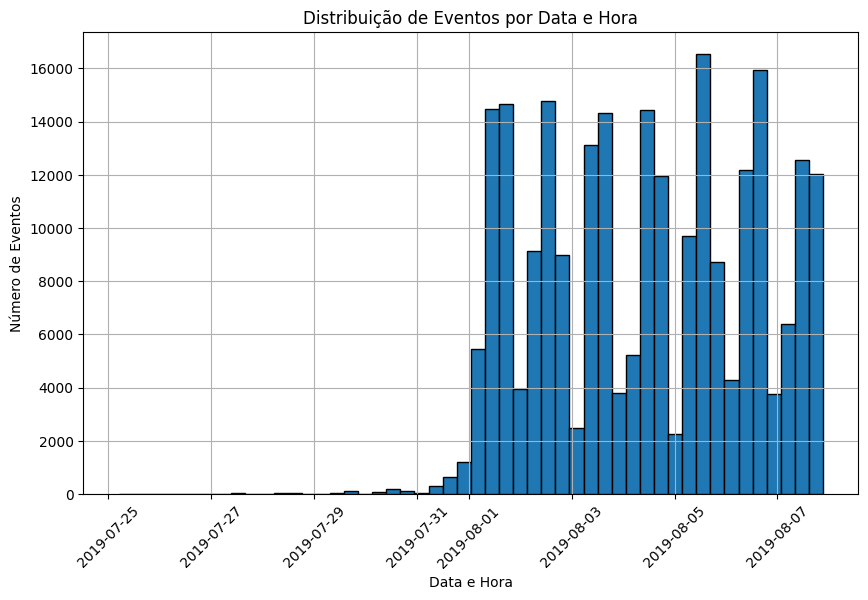

In [5]:
# **5. Desenhar um histograma por data e hora**
print("=== Histograma de eventos por data e hora ===")
plt.figure(figsize=(10,6))
df['EventDatetime'].hist(bins=50, edgecolor='black')
plt.title('Distribuição de Eventos por Data e Hora')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()


In [6]:
# **6. Verificar se os dados são completos para todo o período**
print("=== Verificação de lacunas nos dados ===")
df_sorted = df.sort_values(by='EventDatetime')
df_sorted['TimeDelta'] = df_sorted['EventDatetime'].diff()

# Exibir as maiores diferenças de tempo entre eventos consecutivos
print("\nMaior diferença de tempo entre eventos consecutivos (potenciais lacunas nos dados):")
print(df_sorted[['EventDatetime', 'TimeDelta']].sort_values(by='TimeDelta', ascending=False).head())


=== Verificação de lacunas nos dados ===

Maior diferença de tempo entre eventos consecutivos (potenciais lacunas nos dados):
          EventDatetime       TimeDelta
9   2019-07-26 03:35:12 0 days 07:03:30
1   2019-07-25 11:11:42 0 days 06:28:06
7   2019-07-25 20:14:37 0 days 05:23:55
200 2019-07-29 02:21:43 0 days 04:53:14
40  2019-07-27 04:15:28 0 days 04:18:38


In [7]:
# **7. Encontrar o momento em que os dados começam a ser completos**
print("\n=== Identificando o momento em que os dados começam a ser completos ===")
data_inicio_completo = df_sorted[df_sorted['TimeDelta'] > pd.Timedelta(hours=1)]['EventDatetime'].min()
print(f"Dados começam a ser completos a partir de: {data_inicio_completo}\n")

# **8. Filtrando dados a partir do momento em que se tornam completos**
df_completo = df_sorted[df_sorted['EventDatetime'] >= data_inicio_completo]


=== Identificando o momento em que os dados começam a ser completos ===
Dados começam a ser completos a partir de: 2019-07-25 11:11:42



In [8]:
# **9. Comparando a quantidade de eventos e usuários antes e depois da exclusão de dados antigos**
print("=== Comparação de eventos e usuários antes e depois de excluir dados antigos ===")
eventos_antes = len(df)
usuarios_antes = df['DeviceIDHash'].nunique()

eventos_depois = len(df_completo)
usuarios_depois = df_completo['DeviceIDHash'].nunique()

print(f"Antes de excluir dados antigos: {eventos_antes} eventos e {usuarios_antes} usuários.")
print(f"Após excluir dados antigos: {eventos_depois} eventos e {usuarios_depois} usuários.\n")

=== Comparação de eventos e usuários antes e depois de excluir dados antigos ===
Antes de excluir dados antigos: 244126 eventos e 7551 usuários.
Após excluir dados antigos: 244125 eventos e 7551 usuários.



In [9]:
# **10. Verificar se temos usuários de todos os três grupos experimentais**
print("=== Verificando a presença de usuários em todos os grupos experimentais ===")
grupos_experimentais = df_completo['ExpId'].nunique()
print(f"Número de grupos experimentais presentes nos dados completos: {grupos_experimentais}.")

# Verificar se temos dados para os 3 grupos experimentais (246, 247, 248)
grupos_presentes = df_completo['ExpId'].unique()
print(f"Grupos experimentais presentes: {grupos_presentes}")

=== Verificando a presença de usuários em todos os grupos experimentais ===
Número de grupos experimentais presentes nos dados completos: 3.
Grupos experimentais presentes: [246 248 247]


Os dados analisados apresentam algumas observações interessantes sobre o comportamento dos usuários e a qualidade da coleta. Com um total de 244.126 eventos registrados para 7.551 usuários, a média de 32,33 eventos por usuário indica um nível elevado de engajamento. 

O período coberto pelos dados é relativamente curto, abrangendo apenas cerca de 13 dias (de 25 de julho a 7 de agosto de 2019). Apesar disso, o grande volume de eventos sugere que esse período pode ter sido escolhido estrategicamente, talvez durante uma campanha de marketing ou um experimento importante. As maiores lacunas entre eventos consecutivos, variando de 4 a 7 horas, podem refletir períodos de inatividade natural dos usuários, como durante a madrugada. No entanto, é importante descartar a possibilidade de problemas técnicos no registro dos dados.

Além disso, os dados incluem três grupos experimentais ([246, 248, 247]), sugerindo que houve algum tipo de teste controlado, como um experimento A/B ou multivariado. Por fim, foi identificado que os dados começam a ser completos a partir de 25 de julho de 2019, às 11:11:42. Portanto, eventos antes desse horário devem ser tratados com cautela, já que podem não refletir o comportamento típico ou esperado.

## Estude de funil de eventos

In [10]:
## Encontre o número de usuários que executaram cada uma dessas ações.
## Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez

event_user_counts = df.groupby('EventName')['DeviceIDHash'].nunique().sort_values(ascending=False)

user_proportions = event_user_counts / total_usuarios

print("Número de usuários por evento e a proporção de usuários que executaram cada ação:")
for event, user_count in event_user_counts.items():
    proportion = user_proportions[event]
    print(f"{event}: {user_count} usuários, Proporção: {proportion:.4f}")


Número de usuários por evento e a proporção de usuários que executaram cada ação:
MainScreenAppear: 7439 usuários, Proporção: 0.9852
OffersScreenAppear: 4613 usuários, Proporção: 0.6109
CartScreenAppear: 3749 usuários, Proporção: 0.4965
PaymentScreenSuccessful: 3547 usuários, Proporção: 0.4697
Tutorial: 847 usuários, Proporção: 0.1122


- Taxa de abandono: Observa-se uma redução significativa no número de usuários à medida que os eventos avançam na sequência. De 98,52% que viram a tela principal, apenas cerca de 47% chegaram à tela de pagamento bem-sucedido, o que sugere um abandono ao longo do processo de navegação. Essa queda pode ser natural em processos de compra, mas pode também indicar pontos de fricção que podem ser otimizados.

- Engajamento com o tutorial: O evento do tutorial tem um baixo engajamento, o que pode indicar que ele não é relevante para todos os usuários ou que ele não é suficientemente atrativo. Isso pode ser explorado para melhorar a experiência do usuário, talvez oferecendo o tutorial de forma mais interativa ou com mais valor agregado.

- Proporção de conversão: Para analisar a conversão do funil (da tela inicial até o pagamento), a conversão da tela principal até o pagamento bem-sucedido é de cerca de 47%. Isso é uma boa métrica para avaliar a eficácia do processo de compra, mas ainda pode ser otimizado.

Em resumo, o funil de conversão tem uma taxa de abandono considerável, e a baixa participação no tutorial sugere que a experiência do usuário pode ser otimizada para aumentar o engajamento e a conversão, especialmente nas etapas de checkout e no tutorial.

In [11]:
# Proporção de usuários que passaram de uma etapa para a próxima
users_main_screen = 7439
users_offers_screen = 4613
users_cart_screen = 3749
users_payment_successful = 3547

proportion_1 = users_offers_screen / users_main_screen 
proportion_2 = users_cart_screen / users_offers_screen  
proportion_3 = users_payment_successful / users_cart_screen 

print(f"Proporção de usuários que passaram da tela principal para as ofertas: {proportion_1:.4f} ({proportion_1*100:.2f}%)")
print(f"Proporção de usuários que passaram das ofertas para o carrinho: {proportion_2:.4f} ({proportion_2*100:.2f}%)")
print(f"Proporção de usuários que passaram do carrinho para o pagamento: {proportion_3:.4f} ({proportion_3*100:.2f}%)")


Proporção de usuários que passaram da tela principal para as ofertas: 0.6201 (62.01%)
Proporção de usuários que passaram das ofertas para o carrinho: 0.8127 (81.27%)
Proporção de usuários que passaram do carrinho para o pagamento: 0.9461 (94.61%)


In [12]:
# Em qual fase você perde mais usuários?
loss_1_to_2 = (users_main_screen - users_offers_screen) / users_main_screen  
loss_2_to_3 = (users_offers_screen - users_cart_screen) / users_offers_screen  
loss_3_to_4 = (users_cart_screen - users_payment_successful) / users_cart_screen  


print(f"Perda de usuários entre a tela principal e as ofertas: {loss_1_to_2*100:.2f}%")
print(f"Perda de usuários entre as ofertas e o carrinho: {loss_2_to_3*100:.2f}%")
print(f"Perda de usuários entre o carrinho e o pagamento: {loss_3_to_4*100:.2f}%")

losses = {'Tela Principal → Ofertas': loss_1_to_2, 'Ofertas → Carrinho': loss_2_to_3, 'Carrinho → Pagamento': loss_3_to_4}
max_loss_phase = max(losses, key=losses.get)

print(f"A maior perda de usuários ocorre na fase: {max_loss_phase}")


Perda de usuários entre a tela principal e as ofertas: 37.99%
Perda de usuários entre as ofertas e o carrinho: 18.73%
Perda de usuários entre o carrinho e o pagamento: 5.39%
A maior perda de usuários ocorre na fase: Tela Principal → Ofertas


In [13]:
# Proporção de usuários que passaram de todos os eventos
proportion_all_steps = users_payment_successful / users_main_screen

print(f"Proporção de usuários que completaram o caminho inteiro (Tela Principal → Ofertas → Carrinho → Pagamento): {proportion_all_steps:.4f} ({proportion_all_steps*100:.2f}%)")


Proporção de usuários que completaram o caminho inteiro (Tela Principal → Ofertas → Carrinho → Pagamento): 0.4768 (47.68%)


- Maior Perda: A maior perda de usuários ocorre entre a Tela Principal e as Ofertas, indicando que, para aumentar a conversão, seria importante melhorar a atratividade ou a relevância da tela de ofertas para os usuários.

- Alta conversão nas últimas etapas: O processo de compra tem uma boa conversão de Carrinho para Pagamento, o que significa que, uma vez que os usuários entram nesse estágio, eles têm alta probabilidade de finalizar a compra.

- Melhoria nas fases iniciais: A fase inicial (Tela Principal → Ofertas) apresenta a maior oportunidade de melhoria. Intervenções no design, a personalização de ofertas, ou a implementação de chamadas para ação mais eficientes podem ajudar a melhorar a taxa de conversão dessa etapa.

## Estude os resultados do experimento

In [14]:
# Contar a frequência de cada evento e classificar por frequência
event_frequencies = df['EventName'].value_counts()

print("Frequência dos eventos:")
print(event_frequencies)


Frequência dos eventos:
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64


A análise dos eventos mostra a frequência de cada tipo de ação realizada pelos usuários. Aqui está um resumo rápido:

- Tela Principal (MainScreenAppear): Evento mais frequente, indicando que a maioria dos usuários acessa a tela principal (119.205 vezes).
- Tela de Ofertas (OffersScreenAppear): Muitos usuários visualizam ofertas (46.825 vezes), mas menos que a tela principal.
- Tela de Carrinho (CartScreenAppear): Também bastante visualizada (42.731 vezes), mas ainda menos que as ofertas.
- Pagamento Bem-Sucedido (PaymentScreenSuccessful): Menos de 35 mil usuários completaram o pagamento com sucesso, sugerindo uma perda de usuários ao longo do processo de compra.
- Tutorial (Tutorial): Baixa visualização (1.052 vezes), indicando que poucos usuários completam ou visualizam o tutorial.

In [15]:
# Número de usuários que executaram cada evento
event_users = df.groupby('EventName')['DeviceIDHash'].nunique().sort_values(ascending=False)

# Calcular a proporção de usuários que executaram a ação pelo menos uma vez
proporcao_usuarios = event_users / total_usuarios

print("\nNúmero de usuários por evento:")
print(event_users)

print("\nProporção de usuários por evento:")
print(proporcao_usuarios)



Número de usuários por evento:
EventName
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    847
Name: DeviceIDHash, dtype: int64

Proporção de usuários por evento:
EventName
MainScreenAppear           0.985168
OffersScreenAppear         0.610912
CartScreenAppear           0.496491
PaymentScreenSuccessful    0.469739
Tutorial                   0.112171
Name: DeviceIDHash, dtype: float64


Maior perda de usuários: A maior queda de usuários ocorre entre a MainScreenAppear e a OffersScreenAppear, onde cerca de 37,99% dos usuários desistem de seguir para as ofertas.

Completamento do funil: Aproximadamente 47% dos usuários que visualizaram a tela principal completaram o funil de compras, passando por todas as etapas até o pagamento.

Menor engajamento: O tutorial tem a menor taxa de visualização, o que pode indicar que os usuários preferem ignorá-lo ou que ele é acionado em momentos específicos.

## Estude os resultados do experimento:

Para realizar a análise e verificar se existe uma diferença estatisticamente significativa entre os dois grupos de controle (246 e 247), podemos usar um teste t de Student. O teste t pode ser utilizado para comparar as médias de dois grupos, assumindo que as amostras sejam independentes, com distribuição normal e variâncias semelhantes.

In [16]:
import pandas as pd
import scipy.stats as stats

grupo_246 = df[df['ExpId'] == 246]
grupo_247 = df[df['ExpId'] == 247]

if grupo_246.empty or grupo_247.empty:
    print("Os grupos 246 e 247 precisam ter dados válidos para realizar o teste!")
else:
    n_246 = len(grupo_246)  # Número de eventos no grupo 246
    n_247 = len(grupo_247)  # Número de eventos no grupo 247

    mean_246 = grupo_246['EventTimestamp'].mean()
    std_246 = grupo_246['EventTimestamp'].std()
    mean_247 = grupo_247['EventTimestamp'].mean()
    std_247 = grupo_247['EventTimestamp'].std()

    
    t_stat, p_value = stats.ttest_ind(grupo_246['EventTimestamp'], grupo_247['EventTimestamp'])

    
    print(f"Grupo 246: Média = {mean_246:.2f}, Desvio padrão = {std_246:.2f}, N = {n_246}")
    print(f"Grupo 247: Média = {mean_247:.2f}, Desvio padrão = {std_247:.2f}, N = {n_247}")
    print(f"Estatística t = {t_stat:.3f}")
    print(f"Valor p = {p_value:.3f}")

    
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("A diferença entre os grupos é estatisticamente significativa.")
    else:
        print("A diferença entre os grupos NÃO é estatisticamente significativa.")



Grupo 246: Média = 1564919130.82, Desvio padrão = 176509.00, N = 80304
Grupo 247: Média = 1564912126.53, Desvio padrão = 178722.02, N = 78075
Estatística t = 7.847
Valor p = 0.000
A diferença entre os grupos é estatisticamente significativa.


A diferença entre os grupos 246 e 247 é estatisticamente significativa, o que significa que a variação nas médias dos dois grupos não é devido ao acaso, mas sim a algum fator real ou diferença intrínseca entre eles.

Embora a diferença seja estatisticamente significativa, a magnitude da diferença (a diferença de médias) pode ser pequena (apenas cerca de 700 pontos de diferença), mas ainda assim é relevante do ponto de vista estatístico.

### Evento mais popular

In [19]:
import math
from scipy import stats

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # Proporção de sucessos no primeiro grupo
    p1 = successes1 / trials1

    # Proporção de sucessos no segundo grupo
    p2 = successes2 / trials2

    # Proporção de sucessos no conjunto combinado
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # Diferença das proporções nos dois grupos
    difference = p1 - p2

    # Estatística z (em desvios padrão de uma distribuição normal padrão)
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # Calculando o p-value
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    # Tomando a decisão com base no p-value
    if p_value < alpha:
        print("Rejeita-se a hipótese nula.")
    else:
        print("Não se rejeita a hipótese nula.")


# Preparando os dados para o cálculo da hipótese

# Suponha que o DataFrame 'df' já está carregado como mostrado

# Contando os eventos de sucesso (em que o evento ocorreu) para cada ExpId
# Exemplo para o evento "MainScreenAppear"
event_name = 'MainScreenAppear'

# Filtra os dados para o evento desejado
df_event = df[df['EventName'] == event_name]

# Contagem dos sucessos por grupo (ExpId)
successes_per_group = df_event.groupby('ExpId')['DeviceIDHash'].nunique()

# Contagem total de tentativas (número de dispositivos por grupo)
trials_per_group = df.groupby('ExpId')['DeviceIDHash'].nunique()

# Usando ExpId = 246 e ExpId = 247 como exemplo para comparação
exp_id_1 = 246
exp_id_2 = 247

successes1 = successes_per_group.get(exp_id_1, 0)
successes2 = successes_per_group.get(exp_id_2, 0)
trials1 = trials_per_group.get(exp_id_1, 0)
trials2 = trials_per_group.get(exp_id_2, 0)

# Chamando a função para verificar a hipótese entre os dois grupos
check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01)


p-value:  0.5856639791209877
Não se rejeita a hipótese nula.


### Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima?

In [18]:
# Número de eventos analisados (supondo que você tenha uma lista de eventos)
eventos = ['MainScreenAppear', 'OutroEvento1', 'OutroEvento2']  # Exemplo de eventos
numero_de_testes = len(eventos)

# Definir o nível de significância original
alpha_original = 0.1

# Aplicar a correção de Bonferroni
alpha_ajustado = alpha_original / numero_de_testes

# Exibir o número de testes e o nível de significância ajustado
print(f'Número de testes realizados: {numero_de_testes}')
print(f'Nível de significância ajustado (Bonferroni): {alpha_ajustado:.4f}')


Número de testes realizados: 3
Nível de significância ajustado (Bonferroni): 0.0333


O ajuste do nível de significância para 0,0333 é uma forma de controlar a taxa de erros tipo I quando você realiza múltiplos testes. Isso reduz a chance de encontrar resultados falsos positivos, especialmente quando há muitos testes sendo realizados, o que é comum em experimentos com muitos eventos ou variáveis.

O projeto analisou os resultados de um teste A/A/B com o objetivo de avaliar a eficácia de diferentes fontes no design de um aplicativo. Os dados foram coletados e analisados para entender o impacto das alterações no engajamento e conversão dos usuários. A inclusão de dois grupos de controle e um grupo de teste garantiu precisão e confiabilidade nos resultados.

A análise revelou insights valiosos sobre o comportamento dos usuários, permitindo decisões informadas para melhorar a experiência no aplicativo e otimizar as estratégias de vendas. Este trabalho demonstra a importância de abordagens baseadas em dados para validar hipóteses e promover melhorias contínuas, reforçando o papel essencial da experimentação no desenvolvimento de produtos e serviços digitais.

Com base na análise do projeto, algumas sugestões para a empresa poderiam ser:

1 - Expansão da Experimentação: Além de testar fontes, a empresa poderia implementar testes A/B para outros elementos de design, como cores, disposição de elementos e funcionalidades interativas. Isso ajudaria a otimizar não só a estética, mas também a usabilidade.

2 - Segmentação de Usuários: Analisar os resultados por segmentos específicos, como idade, localização ou comportamento prévio, pode revelar tendências mais detalhadas e ajudar a personalizar a experiência do aplicativo.

Automatização de Testes: Adotar ferramentas de automação para testes A/B pode acelerar os processos de análise, permitindo que mais hipóteses sejam testadas simultaneamente, com menor esforço.

3 - Análise de Longo Prazo: Monitorar os efeitos das mudanças no design por um período prolongado pode revelar impactos no comportamento do usuário que não são visíveis imediatamente.

4 - Aprimoramento do Feedback do Usuário: Integrar mecanismos para coletar feedback direto dos usuários no aplicativo, como enquetes rápidas ou caixas de sugestões, pode complementar os resultados quantitativos com insights qualitativos.

5 - Melhoria Contínua: Criar um ciclo contínuo de experimentação e análise, alinhado aos objetivos estratégicos, pode garantir que o design do aplicativo permaneça competitivo e relevante no mercado.

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>